In [1]:
import networkx as nx
import pandas as pd
from community import community_louvain  # python-louvain library
import matplotlib.pyplot as plt

# Create a directed weighted graph (replace this with your graph)
df=pd.read_csv("graphs/1993.csv")
G = nx.from_pandas_edgelist(df, source='source', target='target', edge_attr='1993', create_using=nx.Graph)

# G.add_weighted_edges_from([(1, 2, 5), (1, 3, 3), (2, 3, 4), (3, 4, 2), (4, 5, 1)])

# Convert edge weights to integer (required by python-louvain)
for u, v, d in G.edges(data=True):
    d['1993'] = float(d['1993'])

# Apply Louvain method for community detection


In [2]:
print(G.number_of_edges())

441


In [6]:
df = nx.to_pandas_adjacency(G)

from scipy.spatial.distance import squareform
dist_array = squareform(df) #https://stackoverflow.com/questions/18952587/use-distance-matrix-in-scipy-cluster-hierarchy-linkage

plt.figure(figsize=(10,10)) 
mergings = linkage(dist_array, method='complete', metric='euclidean')
dendrogram(mergings, labels = distances.index, leafG_rotation=90, leaf_font_size=14)
plt.show()

NameError: name 'linkage' is not defined

<Figure size 1000x1000 with 0 Axes>

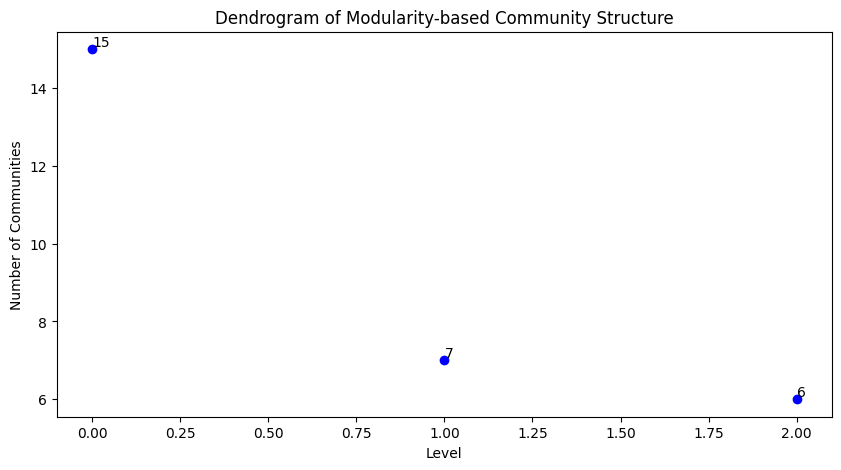

{'United Arab Emirates': 0, 'Germany': 1, 'United Kingdom': 2, 'Japan': 0, 'Hong Kong, China': 0, 'India': 0, 'Saudi Arabia': 0, 'Kuwait': 0, 'Iran, Islamic Rep.': 1, 'United States': 3, 'France': 2, 'Netherlands': 3, 'Italy': 1, 'Ireland': 2, 'Other Asia, nes': 0, 'Korea, Rep.': 0, 'China': 0, 'Australia': 0, 'Indonesia': 0, 'Belgium-Luxembourg': 4, 'Monaco': 0, 'Canada': 5, 'Mexico': 5, 'Argentina': 3, 'Chile': 3, 'Brazil': 3, 'Special Categories': 2, 'New Zealand': 0, 'Burundi': 2, 'Switzerland': 2, 'Bangladesh': 0, 'Singapore': 0, 'Thailand': 0, 'Malaysia': 0, 'Belize': 5, 'Guatemala': 5, 'Spain': 1, 'El Salvador': 5, 'Costa Rica': 5, 'Venezuela': 5, 'Honduras': 5, 'Bolivia': 3, 'Peru': 3, 'Brunei': 0, 'Bhutan': 0, 'Norway': 2, 'Sweden': 2, 'Central African Republic': 4, 'Fm Sudan': 4, 'Cameroon': 4, 'Congo, Dem. Rep.': 4, 'Congo, Rep.': 3, 'Portugal': 1, 'Colombia': 3, 'Ecuador': 3, 'Cyprus': 1, 'Greece': 1, 'Lebanon': 1, 'Czech Republic': 1, 'Slovak Republic': 1, 'Russian Federat

In [5]:
partition = community_louvain.best_partition(G, weight='1993')
dendrogram = community_louvain.generate_dendrogram(G, weight='weight')

plt.figure(figsize=(10, 5))
for level in range(len(dendrogram)):
    partition = community_louvain.partition_at_level(dendrogram, level)
    sizes = len(set(partition.values()))
    plt.plot(level, sizes, marker='o', color='b')
    plt.text(level, sizes, str(sizes), verticalalignment='bottom')

plt.title('Dendrogram of Modularity-based Community Structure')
plt.xlabel('Level')
plt.ylabel('Number of Communities')
plt.show()
print(partition)


In [ ]:
from scipy.cluster import hierarchy

import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc  

linkage_matrix=shc.linkage(x, method="ward")

# linkage_matrix=nx.to_numpy_matrix(G)
plt.figure(figsize=(300, 300))
dendrogram = hierarchy.dendrogram(linkage_matrix, labels=nodes, leaf_rotation=270)
plt.title('Dendrogram')
plt.xlabel('Data points')
plt.ylabel('Distance')
plt.savefig('dendrogram.png', dpi=200)

In [22]:
cluster={}
for k,v in partition.items():
    if v not in cluster:
        cluster[v]=[k]
    else:
        cluster[v].append(k)

print(cluster)


{2: ['United Arab Emirates', 'Japan', 'Hong Kong, China', 'Saudi Arabia', 'Kuwait', 'Iran, Islamic Rep.', 'Other Asia, nes', 'Korea, Rep.', 'China', 'Indonesia', 'Monaco', 'Singapore', 'Thailand', 'Malaysia', 'Brunei', 'Sri Lanka', 'Macao', 'Oman', ' World'], 6: ['Germany', 'France', 'Italy', 'Burundi', 'Switzerland', 'Spain', 'Sweden', 'Congo, Rep.', 'Portugal', 'Greece', 'Czech Republic', 'Slovak Republic', 'Russian Federation', 'Austria', 'Denmark', 'Algeria', 'Finland', 'Gabon', 'Croatia', 'Bosnia and Herzegovina', 'Slovenia', 'Hungary', 'Morocco', 'Madagascar', 'Reunion', 'Romania', 'Turkey', 'Tunisia', 'Libya'], 3: ['United Kingdom', 'Ireland', 'Norway', 'Cyprus', 'Lebanon', 'Dominica', 'Netherlands Antilles', 'Guadeloupe', 'Barbados', 'St. Lucia', 'Iceland', 'St. Kitts and Nevis', 'Anguila', 'Antigua and Barbuda', 'Mauritius', 'St. Vincent and the Grenadines'], 4: ['India', 'Bangladesh', 'Bhutan'], 5: ['United States', 'Canada', 'Mexico', 'Belize', 'Guatemala', 'El Salvador', 'C

In [16]:
modularity2 = community_louvain.modularity(partition, G, weight='1993')
print("The modularity Q based on networkx is {}".format(modularity2))

The modularity Q based on networkx is 0.3920280700392164


In [21]:
dendrogram = community_louvain.generate_dendrogram(G, weight='1993')

# Plot the dendrogram
plt.figure(figsize=(10, 5))
community_louvain.draw_dendrogram(dendrogram)
plt.title('Dendrogram of Modularity-based Community Structure')
plt.xlabel('Nodes')
plt.ylabel('Modularity')
plt.show()

AttributeError: module 'community.community_louvain' has no attribute 'draw_dendrogram'

<Figure size 1000x500 with 0 Axes>